# Libraries

In [1]:
# basics
import numpy as np
import pandas as pd 

# for plots
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Dataset

### Description

In [2]:
df = pd.read_csv("housing.csv")#.drop(columns='ocean_proximity')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
## check nulls of data 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* The Dataset a contains 20640 instances and only 207 null values in total bedrooms feature
* Will need to think about a method to treat null values
* Every features are continuous of type float64, but ocean_proximity is a category 
* We aim to predict `median_house_value` : "Median income for households within a block of houses (measured in tens of thousands of US Dollars)"

# Exploratory Data Analysis


In [6]:
# set up some Seaborn params to standardize plots

sns.set_style('darkgrid')

PALETTE = "Set2"
sns.set_palette(PALETTE)
sns.color_palette(PALETTE)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### Distributions

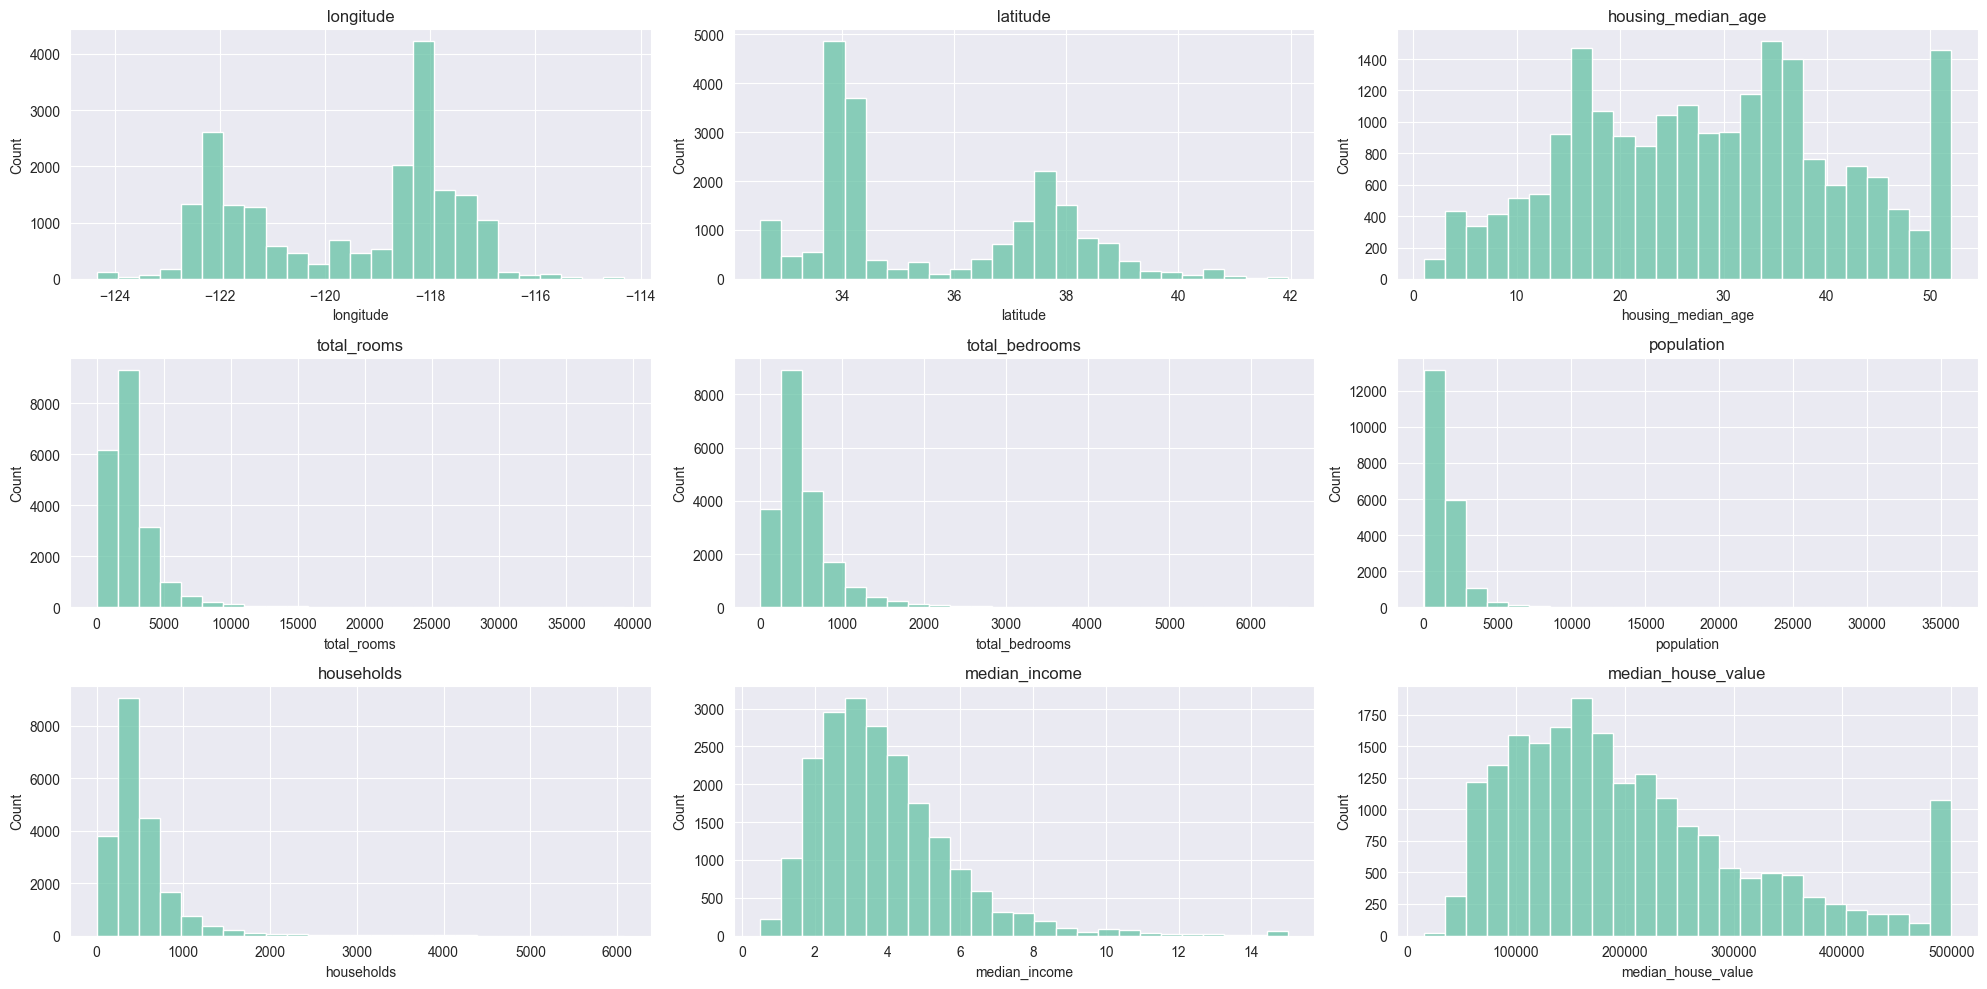

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

columns = df.drop(columns='ocean_proximity').columns

for i, column in enumerate(columns):
    sns.histplot(data=df, 
                 x=column,
                 bins=25,
                 ax=axes[i],
                 kde=False
                 )
    
    axes[i].set_title(column)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()

- why total_rooms, total_bedrooms, households and populations have almost the same distributions ?
- can we interprete longitude and latitude ? (spoiler, no)
- the high number of observations in the last bin of `median_house_value` \& `median_housing_age` potentially show a data quality issue. Were some values rounded during the collection ?

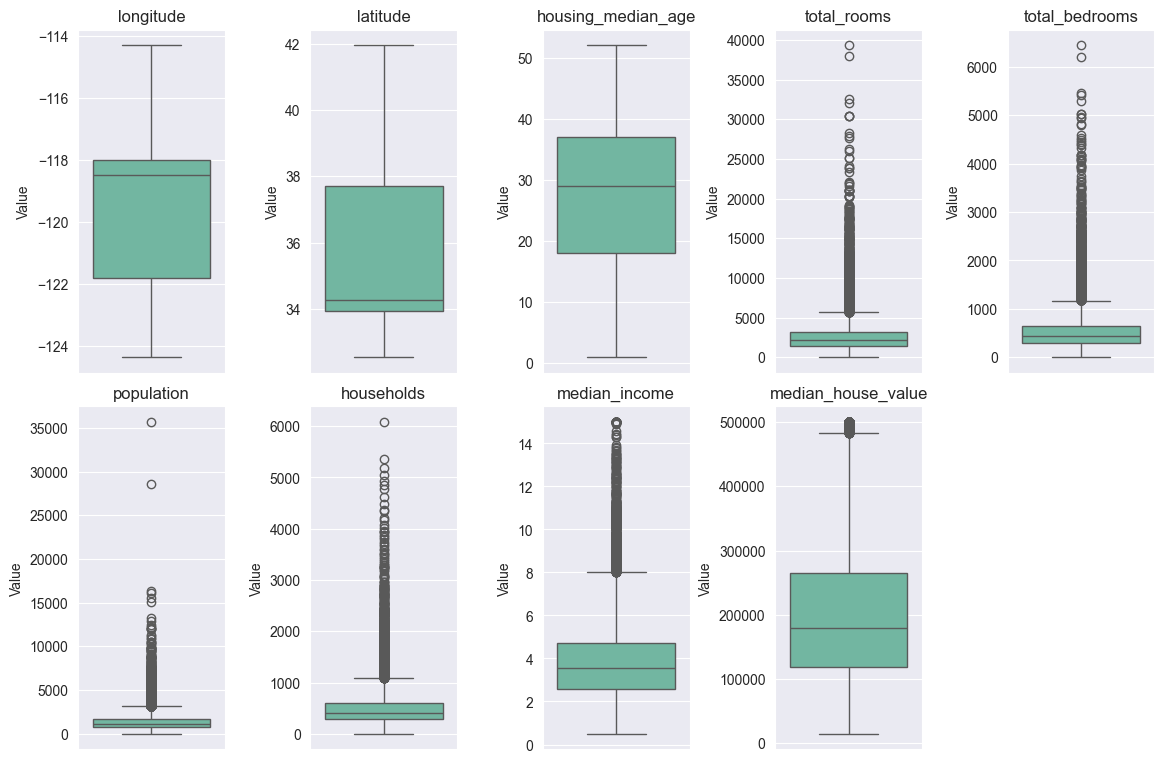

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8))

axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, 
                y=column, 
                ax=axes[i],
                showfliers = True
                )
    axes[i].set_title(column, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Value")

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0, w_pad=0.7, h_pad=0.9)
plt.show()

- Why do we have so many outliers in some columns ? Instead of removing them, we can try to investigate
- need to scale the data
- we can see high inequalities in the `median_income` distribution
- `population` have also outliers. It might be blocks in city center which contains higher buildings. If we drop them, Models could'nt predict blocks in city centers.
- What are the two isolated outliers ? Are they 

### Ocean proximity

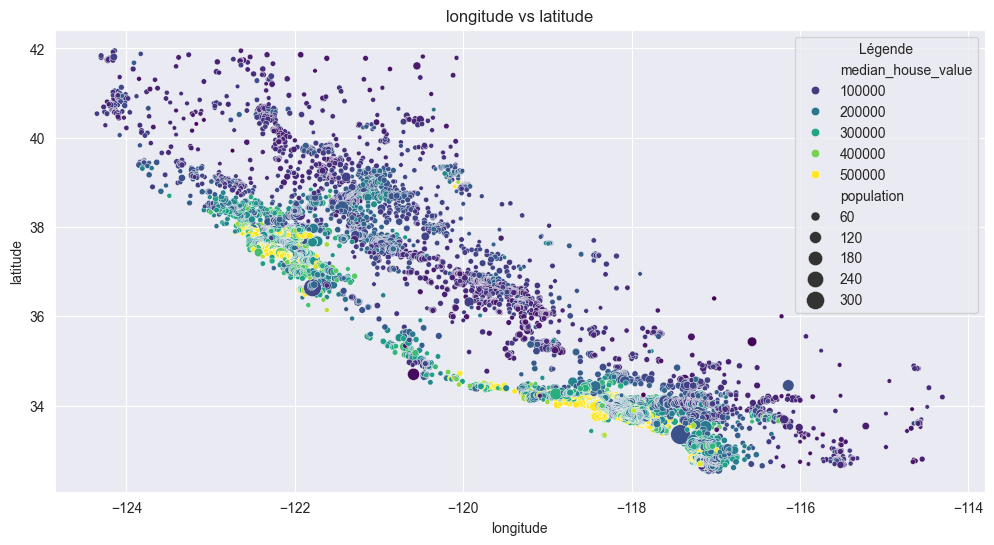

In [9]:
plt.figure(figsize=(12,6))
sc = sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    palette="viridis",
    hue = "median_house_value",
    size = df["population"]/100,
    sizes = (10, 200)
)

plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend(title="Légende")
plt.show()

* from this map, we can see that blocks located near the ocean are : 
    - more populated 
    - more exepensive
* the feature `ocean_proximity` was created to capture the location impact

In [10]:
# Explore the column ocean_proximity
ocean_values = df["ocean_proximity"].value_counts()
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\Olivier\AppData\Local\Temp\ipykernel_16512\2699601773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


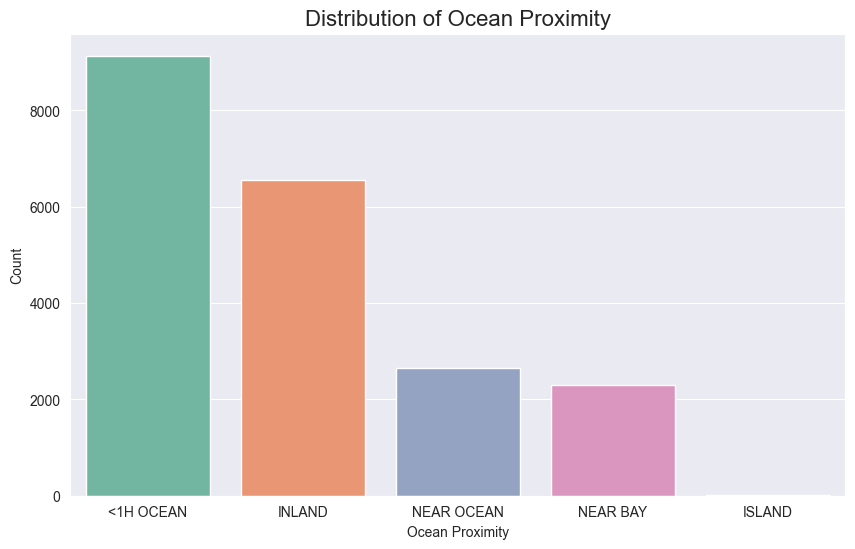

In [11]:
plt.figure(figsize=(10, 6))

# Countplot
ax = sns.barplot(
    x=ocean_values.index, 
    y=ocean_values.values, 
    order=ocean_values.index,
    palette=PALETTE
)

ax.set_xlabel('Ocean Proximity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Ocean Proximity', fontsize=16)

plt.show()

* Five categories for proximity to Ocean. 
* Isn't too much ? Do we have different distribution of the target w.r.t ocean proximity ? 
* Is there some feature interactions ? for instance : if the house is `NEAR BAY`, does `Median income` have a different impact on the price ?

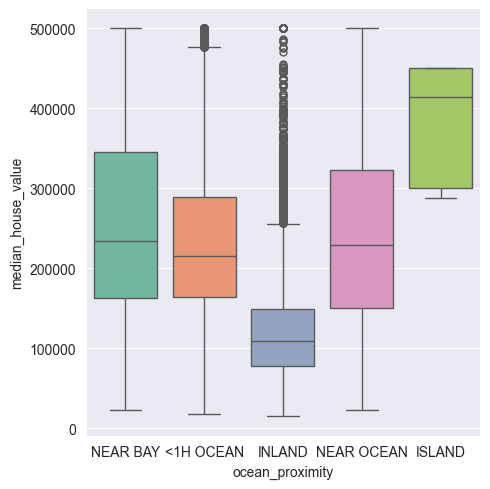

In [12]:
# Boxplot between ocean_proximity and median_income
sns.catplot(x='ocean_proximity',
            y="median_house_value",
            kind='box',
            data=df,
            palette=PALETTE,
            hue = 'ocean_proximity'
            )

- houses inland are in average much cheaper than others. 
- Houses in Island are the most expensive, but contains only 5 observations -> the distribution isn't relevant
- `<1H OCEAN`, `NEAR BAY` \& `NEAR OCEAN` have similar distributions. If we can't observe significant feature interactions, we might group them in one category (and thus reduce the number of features).

(0.0, 5000.0)

<Figure size 1000x600 with 0 Axes>

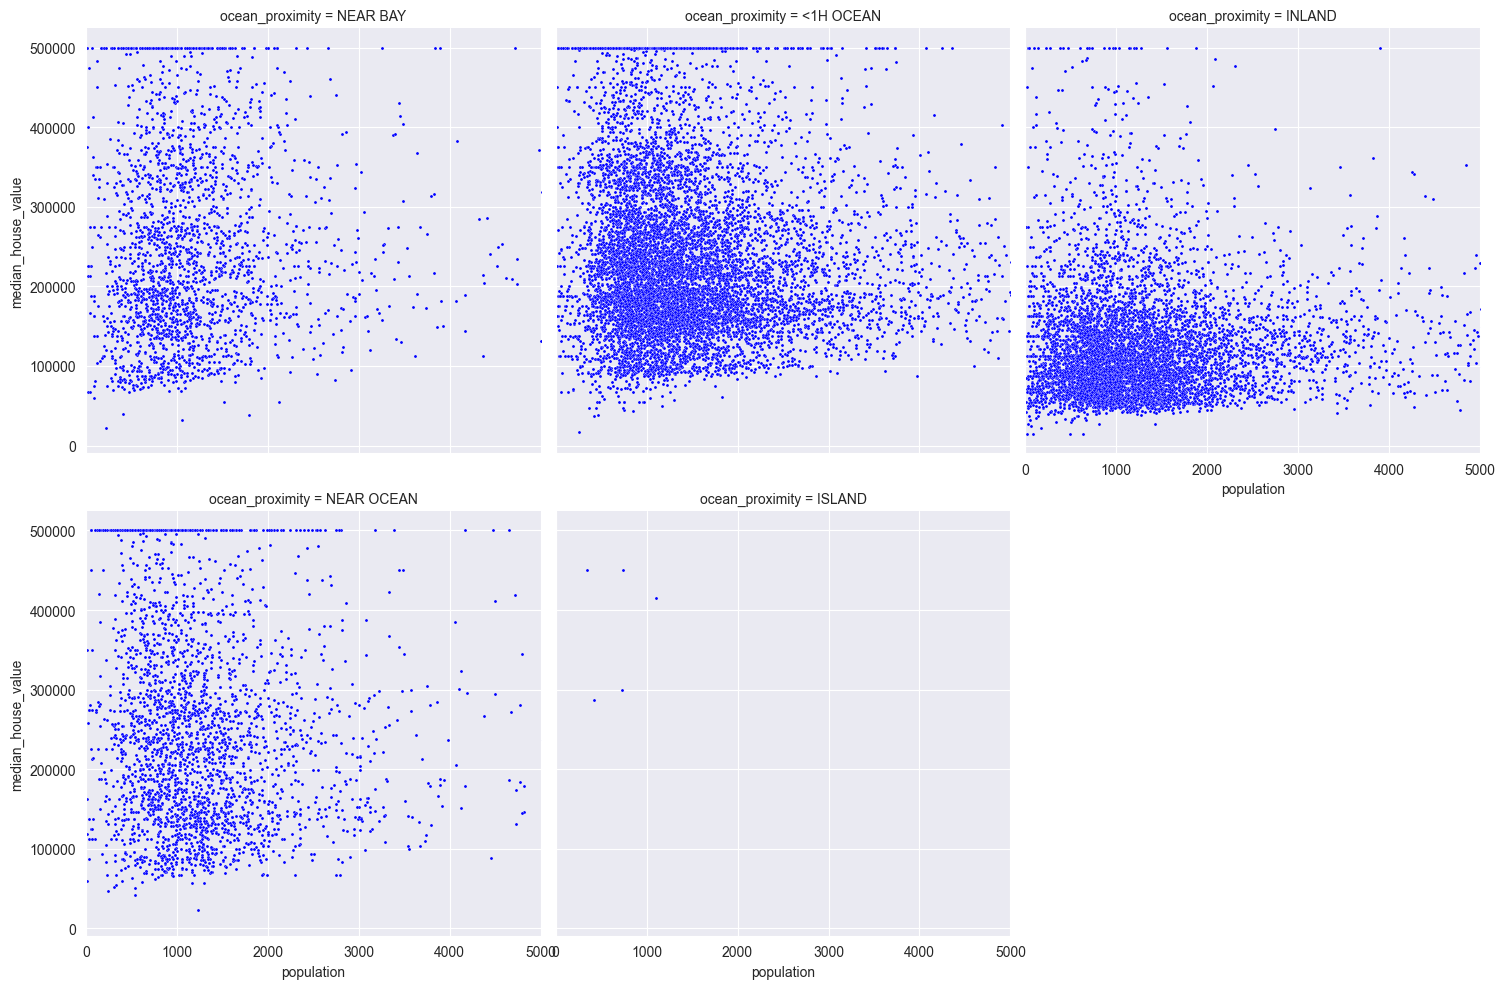

In [13]:
plt.figure(figsize=(10, 6))
sns.relplot(x="population",
            y='median_house_value',
            data=df,
            col="ocean_proximity",
            col_wrap=3,
            s=5,
            color = 'blue')
plt.xlim([0, 5000]) 

- after plotting the above plot for different X feature, I couldn't observe strong difference of correlations between `NEAR BAY`, `NEAR OCEAN` and `<1H OCEAN`.
- therefore, I will group these three categories in one

### Housing median age

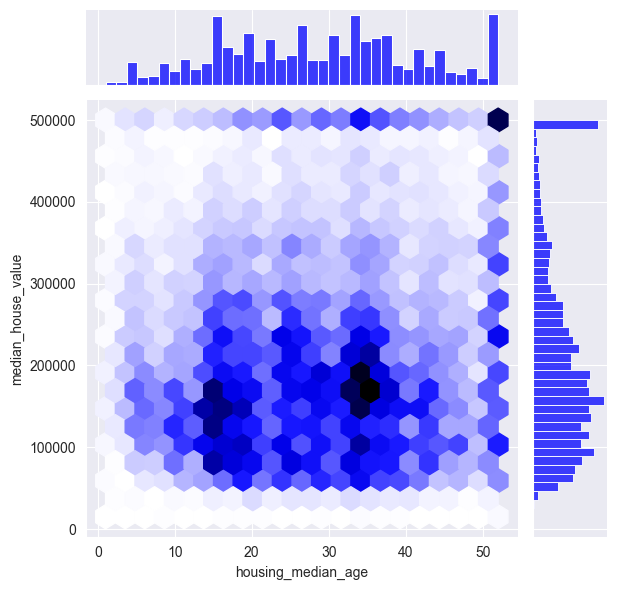

In [14]:
sns.jointplot(
    x="housing_median_age",
    y="median_house_value",
    data=df,
    kind='hex',
    gridsize=20,
    color='blue'
)
plt.show()

- the density isnt uniform. `housing_median_age` might help models to capture values. 

In [15]:
df["age_bins"] = pd.cut(df["housing_median_age"], 
                        bins=[0, 10, 20, 30, 40, np.inf], 
                        labels=["0-10", 
                                "10-20", 
                                "20-30", 
                                "30-40",
                                "40-50"]
                                )

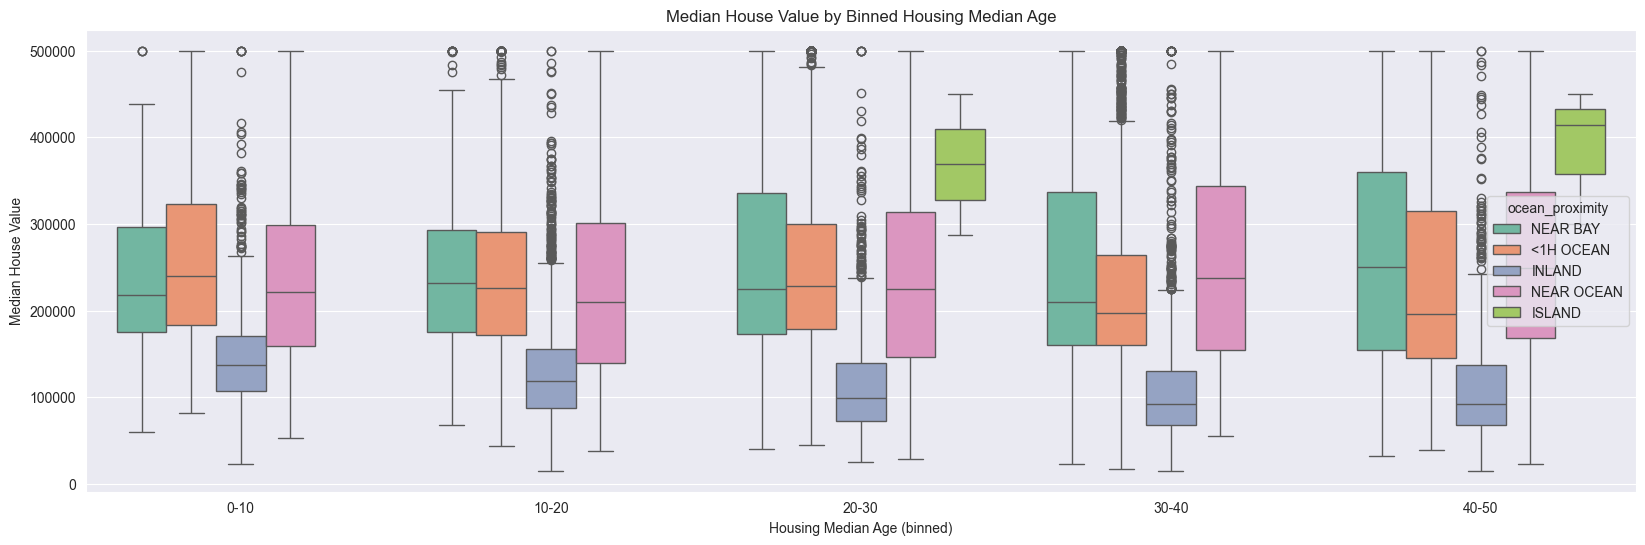

In [16]:
plt.figure(figsize=(20, 6))
sns.boxplot(
    data=df,
    x="age_bins",
    y="median_house_value",
    palette=PALETTE,
    hue = 'ocean_proximity'
)
plt.title("Median House Value by Binned Housing Median Age")
plt.xlabel("Housing Median Age (binned)")
plt.ylabel("Median House Value")
plt.show()

- very small and constant decrease of the values over years for `INLAND` houses. 
- For the others, values have a higher variance, maybe because blocks near ocean or in city centers contain more various type of houses and architecture.
- Interesting the see that `INLAND` blocks also contains very expensive houses. Might be isolated secondary houses of some very reach people ?
- what about old fisher buildings ? (is there some in california ?) The old houses near bay have a lower value compared to most recent houses.

## Feature engineering

### Some ideas

Location : 
- With `longitude` and `latitude`, we could calculate the distance of each bloc to the city center of their cities, or other locations of interest

Housing features : 
- convert column to average per population
    - from `total_bedrooms` \& `households` -> `average_bedrooms_per_household`
    - from `total_rooms` \& `households` -> `average_rooms_per_household`
    - from `total_bedrooms` \& `total_rooms` -> `bedrooms_per_rooms`

Population density :
-  Dividing `population` by `households` -> `population_per_household`

Economic features : 
- Dividing `median_income` by `population_per_household` -> `income_per_capita`

In [17]:
# Create new features

# Housing features
df['average_bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['average_rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']

# Population density
df['population_per_household'] = df['population'] / df['households']
# to capture the average number of people per household. 
# You might have a lot of people in a small house, but in a non crowded area.
# You might also have a few people in very crowded areas.

# Economic features
df['income_per_capita'] = df['median_income'] / df['population_per_household'] 
# wealth indicator. If someone has a high income, but 5 children, the data median income doesnt capture that well. 
# By computing `income_per_capita`, we add some poverty related information



# Group different ocean_proximity values

categories_to_group = ['NEAR BAY', 'NEAR OCEAN', '<1H OCEAN']

df['ocean_proximity'] = df['ocean_proximity'].replace(categories_to_group, 'Close_to_Ocean')

(0.0, 5000.0)

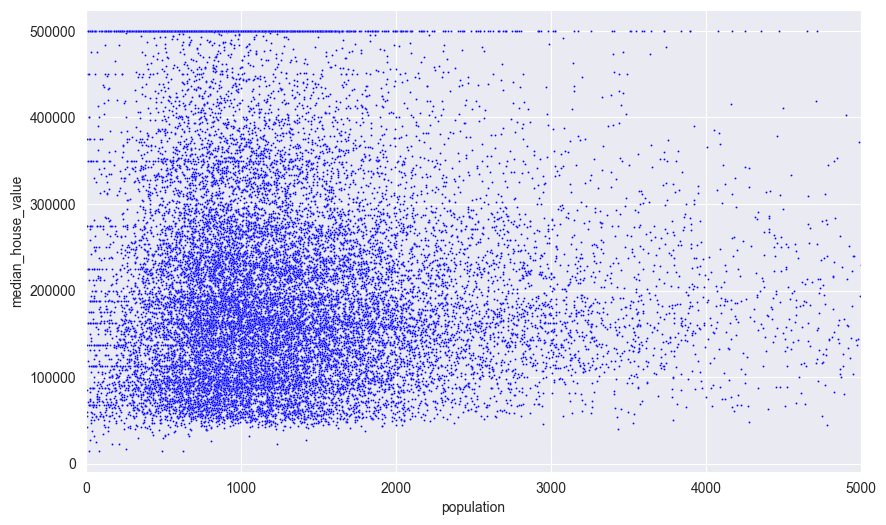

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="population",
    y="median_house_value",
    #alpha=0.1, #control transparency
    s = 2,
    color = 'blue'
)
plt.xlim([0, 5000]) 
#plt.show()

# you can play with this scatter plot to see different correlations

# Data preprocessing


- drop outliers 
- scale
- split
- train for 4 models
- analyse the different results

## Data cleaning


In [19]:
df = df[df['ocean_proximity'] != 'ISLAND']
# Drop the ocean_proximity column. It contains only 5 different values and might be particular type of houses.

In [29]:
# Fill the null values in total bedrooms column by mean
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
df['average_bedrooms_per_household'] = df['average_bedrooms_per_household'].fillna(df['average_bedrooms_per_household'].mean())
df['average_rooms_per_household'] = df['average_rooms_per_household'].fillna(df['average_rooms_per_household'].mean())
df['bedrooms_per_rooms'] = df['bedrooms_per_rooms'].fillna(df['bedrooms_per_rooms'].mean())
# could also replace with KNN


# since we dont have many Nan, we could also drop them

C:\Users\Olivier\AppData\Local\Temp\ipykernel_16512\3240817675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
C:\Users\Olivier\AppData\Local\Temp\ipykernel_16512\3240817675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_bedrooms_per_household'] = df['average_bedrooms_per_household'].fillna(df['average_bedrooms_per_household'].mean())
C:\Users\Olivier\AppData\Local\Temp\ipykernel_16512\3240817675.py:4: Setti

In [21]:
# delete outliers ?
# I prefer to keep them, but we could check if models are more performant without them

"""
df = df[df["total_bedrooms"]<=5000]
df = df[df["households"]<=4400]
df = df[df["median_income"]<=12]"""

'\ndf = df[df["total_bedrooms"]<=5000]\ndf = df[df["households"]<=4400]\ndf = df[df["median_income"]<=12]'

## Encoding ocean proximity

In [22]:
df['ocean_proximity'].unique()

array(['Close_to_Ocean', 'INLAND'], dtype=object)

In [23]:
mapping = {
    'INLAND' : False,
    'Close_to_Ocean' : True
}

df['ocean_proximity'] = df['ocean_proximity'].map(mapping)

C:\Users\Olivier\AppData\Local\Temp\ipykernel_16512\534338537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'] = df['ocean_proximity'].map(mapping)


## Split and scaling function

In [31]:
def split_and_scale(df, 
                    target_column,
                    TEST_SIZE=0.2,
                    RANDOM_STATE=18,
                    scaler='min_max'
                    ):

    # Split the data into features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size=TEST_SIZE, 
                                                        random_state=RANDOM_STATE
                                                        )

    # Select numerical features to scale
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Scale the numerical data
    if scaler == 'min_max':
        scaler = MinMaxScaler()
        X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
        
    elif scaler == 'robust':
        scaler = RobustScaler()
        X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    else:
        print('Data not scaled')


    return X_train, X_test, y_train, y_test


In [32]:
X_train, X_test, y_train, y_test = split_and_scale(df, 'median_house_value', 
                                                   scaler='robust', # since i kept outliers
                                                   )


In [33]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,age_bins,average_bedrooms_per_household,average_rooms_per_household,bedrooms_per_rooms,population_per_household,income_per_capita
13842,0.308707,0.079365,-0.578947,-1.086790,-1.098551,-1.038217,-1.073846,-1.245095,False,10-20,-0.724962,-0.354149,0.120124,0.365576,-1.137979
2134,-0.321900,0.674603,-0.210526,-0.736099,-0.817391,-0.552017,-0.747692,-0.243772,False,20-30,-1.199419,0.027838,-0.398843,1.255519,-0.576979
8284,0.092348,-0.126984,1.052632,0.391880,0.730435,0.143312,0.735385,-0.109504,True,40-50,0.162248,-0.564096,0.677897,-0.955569,0.382786
8898,0.000000,-0.060847,-0.052632,0.246543,0.910145,0.405520,0.830769,-0.284047,True,20-30,0.627145,-0.908812,1.433999,-0.636195,-0.017211
1091,-0.875989,1.444444,-0.578947,-0.531921,-0.544928,-0.486200,-0.393846,-0.690809,False,10-20,-1.744707,-0.539425,0.012419,-0.354799,-0.539061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18679,-0.897098,0.698413,-0.578947,0.381289,0.156522,0.124204,-0.172308,0.846204,True,10-20,3.744045,1.619098,-0.413302,0.953870,0.203134
5294,0.013193,-0.047619,-0.157895,0.829067,0.898551,0.165605,0.790769,1.674457,True,20-30,0.797137,0.050425,0.122138,-0.982248,2.560900
16310,-0.749340,0.994709,-0.105263,-0.302442,-0.591304,-0.569002,-0.473846,0.823190,False,20-30,-1.440185,0.673921,-0.916882,-0.412293,0.949610
1726,-1.023747,0.978836,0.157895,-0.487202,-0.217391,-0.477707,-0.433846,-1.173703,True,30-40,3.316235,-0.235273,1.186583,-0.176315,-1.023583


# Predictions


In [34]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'age_bins',
       'average_bedrooms_per_household', 'average_rooms_per_household',
       'bedrooms_per_rooms', 'population_per_household', 'income_per_capita'],
      dtype='object')

In [35]:
columns = ['average_bedrooms_per_household',
       'average_rooms_per_household', 'bedrooms_per_rooms',
       'population_per_household', 'income_per_capita', 
       'ocean_proximity'
       ]
# I voluntaryly dont use all of the features. We could in the other iteration add some others

X_train_1 = X_train[columns]
X_test_1 = X_test[columns]

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

for name, model in models.items():
    print(f"__________ {name} __________")
    model.fit(X_train_1, y_train)
    predictions = model.predict(X_test_1)
    mse = mean_squared_error(y_test, predictions)
    rmse = root_mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}\n")

__________ Linear Regression __________
Mean Squared Error: 4521573052.80679
Root Mean Squared Error: 67242.64311288478

__________ Decision Tree __________
Mean Squared Error: 8004690883.938454
Root Mean Squared Error: 89468.93809551142

__________ Random Forest __________
Mean Squared Error: 4166281691.146261
Root Mean Squared Error: 64546.740360348645

__________ Support Vector Regressor __________
Mean Squared Error: 13989910112.00773
Root Mean Squared Error: 118278.95041810158

__________ K-Neighbors Regressor __________
Mean Squared Error: 4663454600.60095
Root Mean Squared Error: 68289.49114322753



- models are trained without any optimisation

In [41]:
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_1, y_train)

predictions = random_forest.predict(X_test_1)

mse_rf = mean_squared_error(y_test, predictions)
rmse_rf = np.sqrt(mse_rf)

print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")


residuals = y_test - predictions

Mean Squared Error (MSE): 4166281691.1463
Root Mean Squared Error (RMSE): 64546.7404


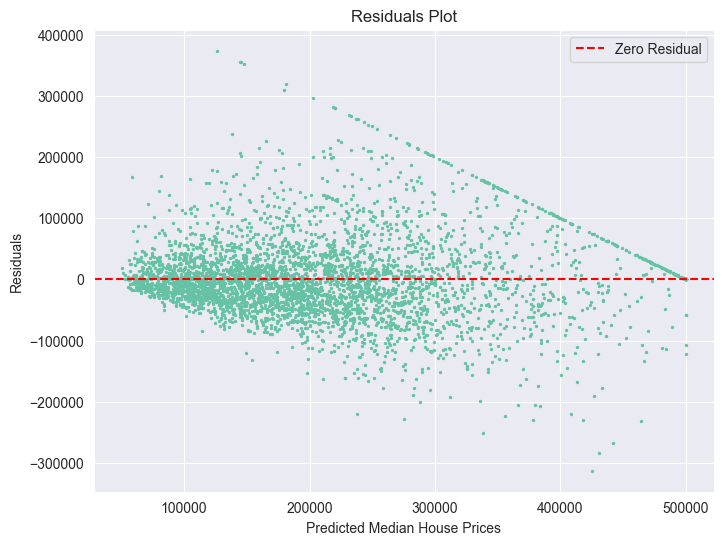

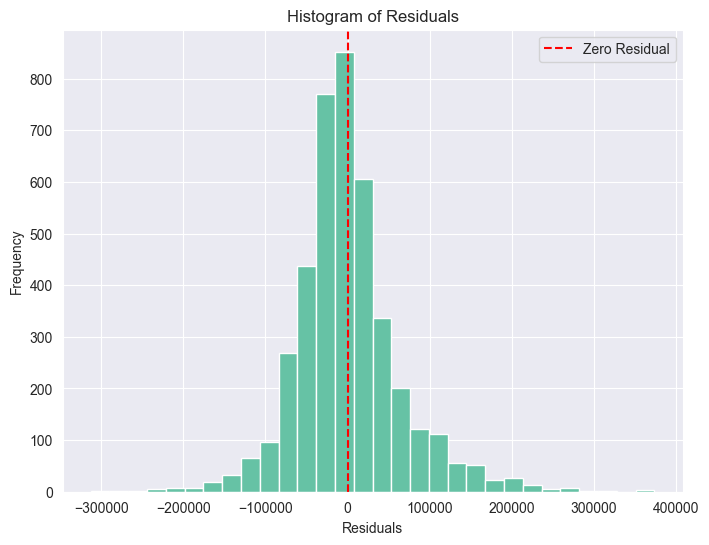

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, 
            residuals, 
            s=2)
plt.axhline(y=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Residuals Plot")
plt.xlabel("Predicted Median House Prices")
plt.ylabel("Residuals")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.axvline(x=0, color="red", linestyle="--", label="Zero Residual")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.show()

- performance of the model should be analysed and compared with some other models
- I could also train models using other features, other scaling methods, other outlier policy etc